In [1]:
import pandas  as pd 
import glob
import pandas as pd 
import os 
import pylint
from unidecode import unidecode
import numpy as np 
from tqdm import trange, tqdm
import gc 
import warnings
colnames=['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']
df = pd.read_csv('/home/abderrazak/ALLINHERE/NLP/Datacamp/house-votes-84.csv', names=colnames)
df.shape

(435, 17)

In [2]:
df.columns

Index(['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa'],
      dtype='object')

In [3]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party                435 non-null object
infants              435 non-null object
water                435 non-null object
budget               435 non-null object
physician            435 non-null object
salvador             435 non-null object
religious            435 non-null object
satellite            435 non-null object
aid                  435 non-null object
missile              435 non-null object
immigration          435 non-null object
synfuels             435 non-null object
education            435 non-null object
superfund            435 non-null object
crime                435 non-null object
duty_free_exports    435 non-null object
eaa_rsa              435 non-null object
dtypes: object(17)
memory usage: 57.9+ KB


In [5]:
df.describe()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
unique,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269



Bad key savefig.frameon in file /home/abderrazak/Téléchargements/yes/envs/stuff/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /home/abderrazak/Téléchargements/yes/envs/stuff/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /home/abderrazak/Téléchargements/yes/envs/stuff/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout

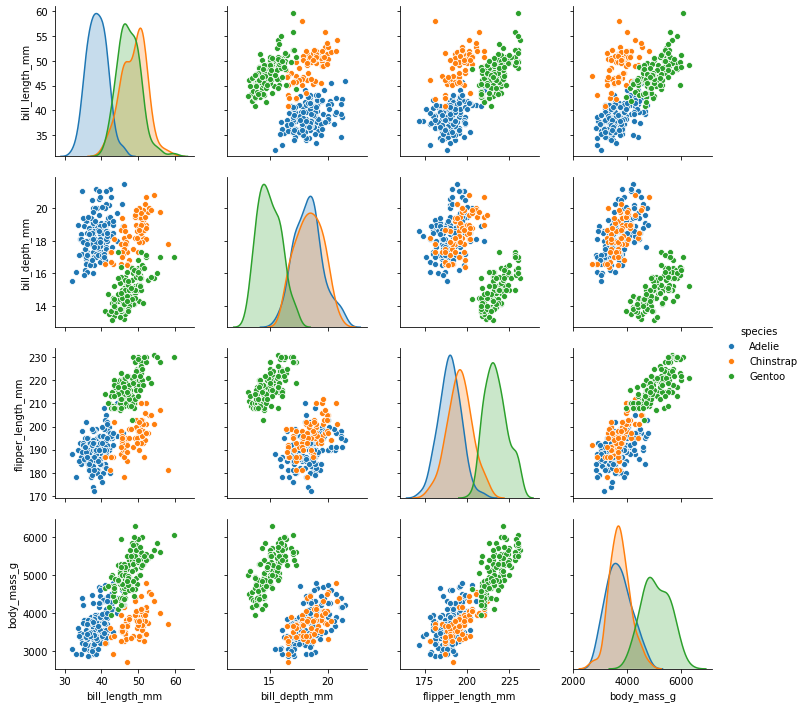

In [6]:
import seaborn as sns 
warnings.filterwarnings("ignore")
penguins = sns.load_dataset("penguins")
sns.pairplot(penguins, hue="species")

In [7]:
def reduce_mem_usage(df, int_cast=True, obj_to_category=False, subset=None):
    """
    Iterate through all the columns of a dataframe and modify the data type to reduce memory usage.
    :param df: dataframe to reduce (pd.DataFrame)
    :param int_cast: indicate if columns should be tried to be casted to int (bool)
    :param obj_to_category: convert non-datetime related objects to category dtype (bool)
    :param subset: subset of columns to analyse (list)
    :return: dataset with the column dtypes adjusted (pd.DataFrame)
    """
    start_mem = df.memory_usage().sum() / 1024 ** 2;
    gc.collect()
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    cols = subset if subset is not None else df.columns.tolist()

    for col in tqdm(cols):
        col_type = df[col].dtype

        if col_type != object and col_type.name != 'category' and 'datetime' not in col_type.name:
            c_min = df[col].min()
            c_max = df[col].max()

            # test if column can be converted to an integer
            treat_as_int = str(col_type)[:3] == 'int'
            if int_cast and not treat_as_int:
                treat_as_int = check_if_integer(df[col])

            if treat_as_int:
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.uint64).min and c_max < np.iinfo(np.uint64).max:
                    df[col] = df[col].astype(np.uint64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        elif 'datetime' not in col_type.name and obj_to_category:
            df[col] = df[col].astype('category')
    gc.collect()
    end_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage after optimization is: {:.3f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [8]:
df= reduce_mem_usage(df)

100%|██████████| 17/17 [00:00<00:00, 44564.48it/s]

Memory usage of dataframe is 0.06 MB
Memory usage after optimization is: 0.056 MB
Decreased by 0.0%


In [9]:
df.shape

(435, 17)

In [10]:
#pd.plotting.scatter_matrix(df)

In [11]:
#sns.pairplot(df, hue="republican")

# Visual EDA

The Numerical EDA you did in the previous exercise gave you some very important information, such as the names and data types of the columns, and the dimensions of the DataFrame. Following this with some visual EDA will give you an even better understanding of the data. In the video, Hugo used the scatter_matrix() function on the Iris data for this purpose. However, you may have noticed in the previous exercise that all the features in this dataset are binary; that is, they are either 0 or 1. So a different type of plot would be more useful here, such as Seaborn's countplot.

Given on the right is a countplot of the 'education' bill, generated from the following code:

plt.figure()

sns.countplot(x='education', hue='party', data=df, palette='RdBu')

plt.xticks([0,1], ['No', 'Yes'])

plt.show()


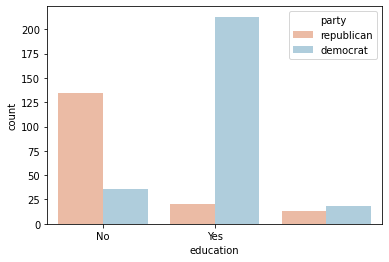

In [12]:
import matplotlib.pyplot as plt
plt.figure()

sns.countplot(x='education', hue='party', data=df, palette='RdBu')

plt.xticks([0,1], ['No', 'Yes'])

plt.show()


In [13]:
df.party.value_counts()

democrat      267
republican    168
Name: party, dtype: int64

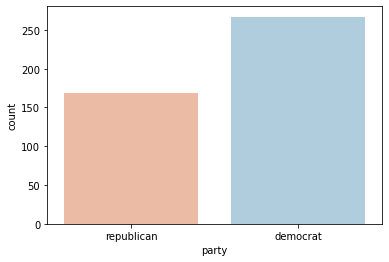

In [14]:
plt.figure()

sns.countplot(x='party', data=df, palette='RdBu')

plt.xticks([0,1], ['republican', 'democrat'])

plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv('/home/abderrazak/ALLINHERE/NLP/Datacamp/hourly_wages.csv')

#### Create the encoder.
# Create arrays for the features and the response variable
y = df['manufacturing'].to_numpy()
X = df.drop('manufacturing', axis=1).to_numpy()
X[0]

array([ 5.1,  0. ,  8. , 21. , 35. ,  1. ,  1. ,  0. ,  0. ])

In [16]:
df.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


In [17]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier


# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)
# Fit the classifier to the data
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=6)

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score
# Predict the labels for the training data X
y_pred =knn.predict(X)

# Predict and print the label for the new data point X_new
X_new=np.array([4.00,0,12,4,22,0,0,0,0]).reshape(1, -1)
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))
print("SCORE:{}".format(accuracy_score(y_pred,y)))
print()

Prediction: [0]
SCORE:0.8277153558052435



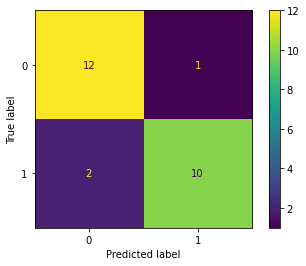

In [19]:
>>> import matplotlib.pyplot as plt  
>>> from sklearn.datasets import make_classification
>>> from sklearn.metrics import plot_confusion_matrix
>>> from sklearn.model_selection import train_test_split
>>> from sklearn.svm import SVC
>>> X, y = make_classification(random_state=0)
>>> X_train, X_test, y_train, y_test = train_test_split(
...         X, y, random_state=0)
>>> clf = SVC(random_state=0)
>>> clf.fit(X_train, y_train)
SVC(random_state=0)
>>> plot_confusion_matrix(clf, X_test, y_test)  
>>> plt.show()  

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

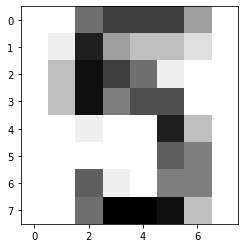

In [22]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits =datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [23]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print(knn.score(X_test,y_test))


0.9833333333333333


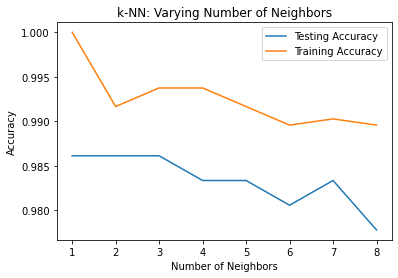

In [24]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test,y_test )

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [25]:
df = pd.read_csv('/home/abderrazak/ALLINHERE/NLP/Datacamp/gm_2008_region.csv')
df.shape

(139, 10)

In [26]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [27]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df


# Create arrays for features and target variabledf = pd.read_csv('/home/abderrazak/ALLINHERE/NLP/Datacamp/gm_2008_region.csv')
df.shape
y = df['life'].to_numpy()
X = df['fertility'].to_numpy()

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y =y.reshape(-1,1)
X = X.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))


Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


In [28]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 10.9+ KB


In [30]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


In [31]:
df.corr()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
population,1.000000,-0.061345,-0.065821,-0.010147,-0.134905,-0.045687,-0.135149,-0.005051,0.008058
fertility,-0.061345,1.000000,0.292695,-0.439747,-0.715380,-0.502615,0.527314,-0.786921,0.901704
HIV,-0.065821,0.292695,1.000000,-0.165889,-0.308700,-0.208410,0.396680,-0.604749,0.394913
CO2,-0.010147,-0.439747,-0.165889,1.000000,0.581031,0.823099,-0.280813,0.476666,-0.458186
BMI_male,-0.134905,-0.715380,-0.308700,0.581031,1.000000,0.625126,-0.447049,0.731559,-0.749691
GDP,-0.045687,-0.502615,-0.208410,0.823099,0.625126,1.000000,-0.400740,0.628999,-0.543874
BMI_female,-0.135149,0.527314,0.396680,-0.280813,-0.447049,-0.400740,1.000000,-0.658718,0.582053
life,-0.005051,-0.786921,-0.604749,0.476666,0.731559,0.628999,-0.658718,1.000000,-0.874106
child_mortality,0.008058,0.901704,0.394913,-0.458186,-0.749691,-0.543874,0.582053,-0.874106,1.000000


<AxesSubplot:>

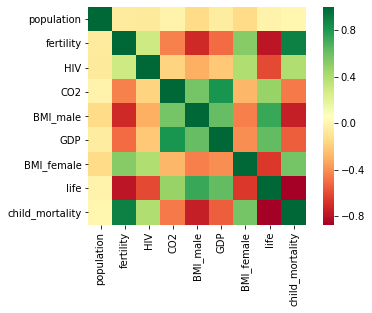

In [32]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

In [33]:
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype
    if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.uint8).min and c_max < np.iinfo(np.uint8).max:
                    df[col] = df[col].astype(np.uint8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.uint16).min and c_max < np.iinfo(np.uint16).max:
                    df[col] = df[col].astype(np.uint16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.uint32).min and c_max < np.iinfo(np.uint32).max:
                    df[col] = df[col].astype(np.uint32)                    
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
                elif c_min > np.iinfo(np.uint64).min and c_max < np.iinfo(np.uint64).max:
                    df[col] = df[col].astype(np.uint64)
            elif str(col_type)[:5] == 'float':
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [34]:
df=reduce_mem_usage(df)

Memory usage of dataframe is 0.01 MB
Memory usage after optimization is: 0.01 MB
Decreased by 0.0%


In [35]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all =LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_pred,y_test))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7298987360907494
Root Mean Squared Error: 4.194027914110243


1. Cross-validation

Great work on those regression challenges! You are now also becoming more acquainted with train test split and computing model performance metrics on your test set. Can you spot a potential pitfall of this process? Well, let's think about it for a bit:
2. Cross-validation motivation

if you're computing R squared on your test set, the R squared returned is dependent on the way that you split up the data! The data points in the test set may have some peculiarities that mean the R squared computed on it is not representative of the model's ability to generalize to unseen data. To combat this dependence on what is essentially an arbitrary split, we use a technique called cross-validation.
3. Cross-validation basics

We begin by splitting the dataset into five groups or folds.
4. Cross-validation basics

Then we hold out the first fold as a test set,
5. Cross-validation basics

fit our model on the remaining four folds,
6. Cross-validation basics

predict on the test set, and
7. Cross-validation basics

compute the metric of interest.
8. Cross-validation basics

Next, we hold out the
9. Cross-validation basics

second fold as our test set,
10. Cross-validation basics

fit on the remaining data,
11. Cross-validation basics

predict on the test set, and
12. Cross-validation basics

compute the metric of interest. Then similarly
13. Cross-validation basics

with the third,
14. Cross-validation basics

fourth, and
15. Cross-validation basics

fifth fold.
16. Cross-validation basics

As a result we get five values of R squared from which we can compute statistics of interest, such as the mean and median and 95% confidence intervals.
17. Cross-validation and model performance

As we split the dataset into five folds, we call this process 5-fold cross validation. If you use 10 folds, it is called 10-fold cross validation. More generally, if you use k folds, it is called k-fold cross validation or k-fold CV. There is, however, a trade-off as using more folds is more computationally expensive. This is because you are fittings and predicting more times. This method avoids the problem of your metric of choice being dependent on the train test split.
18. Cross-validation in scikit-learn

To perform k-fold CV in scikit-learn, we first import cross val score from sklearn dot model selection. As always, we instantiate our model, in this case, a regressor. We then call cross val score with the regressor, the feature data, and the target data as the first three positional arguments. We also specify the number of folds with the keyword argument, cv. This returns an array of cross-validation scores, which we assign to cv results. The length of the array is the number of folds utilized. Note that the score reported is R squared, as this is the default score for linear regression. . We print the scores here. We can also, for example, compute the mean, which we also do. 

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
scores = cross_val_score(reg, X,y,  cv = 5 )
print("scores : {}".format(scores))
print("mean scores :{} ".format(np.mean(scores)))

scores : [0.71001079 0.75007717 0.55271526 0.547501   0.52410561]
mean scores :0.6168819644425119 


In [37]:
cvscores_3 = cross_val_score(reg,X,y,cv=3)
cvscores_10 = cross_val_score(reg,X,y,cv=10)
print("meanscore3:{}".format(np.mean(cvscores_3)))
print("meanscore10:{}".format(np.mean(cvscores_10)))

meanscore3:0.6294715754653507
meanscore10:0.5883937741571185


# Regularized regression

1. Regularized regression


Recall that

2. Why regularize?

what fitting a linear regression does is minimize a loss function to choose a coefficient ai for each feature variable. If we allow these coefficients or parameters to be super large, we can get overfitting. It isn't so easy to see in two dimensions, but when you have loads and loads of features, that is, if your data sit in a high-dimensional space with large coefficients, it gets easy to predict nearly anything. For this reason, it is common practice to alter the loss function so that it penalizes for large coefficients. This is called regularization. The first type of regularized regression that we'll look at is called ridge regression

3. Ridge regression

in which our loss function is the standard OLS loss function plus the squared value of each coefficient multiplied by some constant alpha. Thus, when minimizing the loss function to fit to our data, models are penalized for coefficients with a large magnitude: large positive and large negative coefficients, that is. Note that alpha is a parameter we need to choose in order to fit and predict. Essentially, we can select the alpha for which our model performs best. Picking alpha for ridge regression is similar to picking k in KNN. This is called hyperparameter tuning and we'll see much more of this soon. This alpha, which you may also see called lambda in the wild, can be thought of as a parameter that controls model complexity. Notice that when alpha is equal to zero, we get back OLS. Large coefficients in this case are not penalized and the overfitting problem is not accounted for. A very high alpha means that large coefficients are significantly penalized, which can lead to a model that is too simple and ends up underfitting the data. The method of performing ridge regression with scikit-learn mirrors the other models that we have seen.

4. Ridge regression in scikit-learn

We import Ridge from sklearn dot linear model, we split our data into test and train, fit on the training, and predict on the test. Note that we set alpha using the keyword argument alpha. Also notice the argument normalize: setting this equal to True ensures that all our variables are on the same scale and we will cover this in more depth later. There is another type of regularized regression called lasso regression,

5. Lasso regression

in which our loss function is the standard OLS loss function plus the absolute value of each coefficient multiplied by some constant alpha.

6. Lasso regression in scikit-learn

The method of performing lasso regression in scikit-learn mirrors ridge regression, as you can see here.

7. Lasso regression for feature selection

One of the really cool aspects of lasso regression is that it can be used to select important features of a dataset. This is because it tends to shrink the coefficients of less important features to be exactly zero. The features whose coefficients are not shrunk to zero are 'selected' by the LASSO algorithm. Let's check this out in practice.

8. Lasso for feature selection in scikit-learn

We import Lasso as before and store the feature names in the variable names. We then instantiate our regressor, fit it to the data as always. Then we can extract the coef attribute and store in lasso coef. Plotting the coefficients as a function of feature name yields this figure

9. Lasso for feature selection in scikit-learn

and you can see directly that the most important predictor for our target variable, housing price, is number of rooms! This is not surprising and is a great sanity check. This type of feature selection is very important for machine learning in an industry or business setting because it allows you, as a Data Scientist, to communicate important results to non-technical colleagues. And bosses! The power of reporting important features from a linear model cannot be overestimated. It is also valuable in research science, in order identify which factors are important predictors for various physical phenomena.

In [38]:
df = pd.read_csv('/home/abderrazak/ALLINHERE/NLP/Datacamp/boston.csv')
df.shape

(506, 14)

In [39]:
df = df.dropna()
df.shape

(506, 14)

In [40]:
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [41]:
df['CRIM'] = df['CRIM'].astype(float)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NX         506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 59.3 KB


In [43]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

<AxesSubplot:>

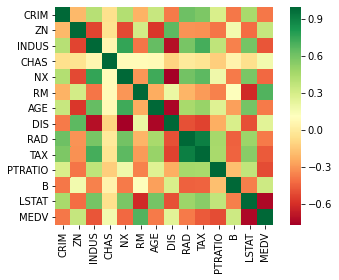

In [44]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

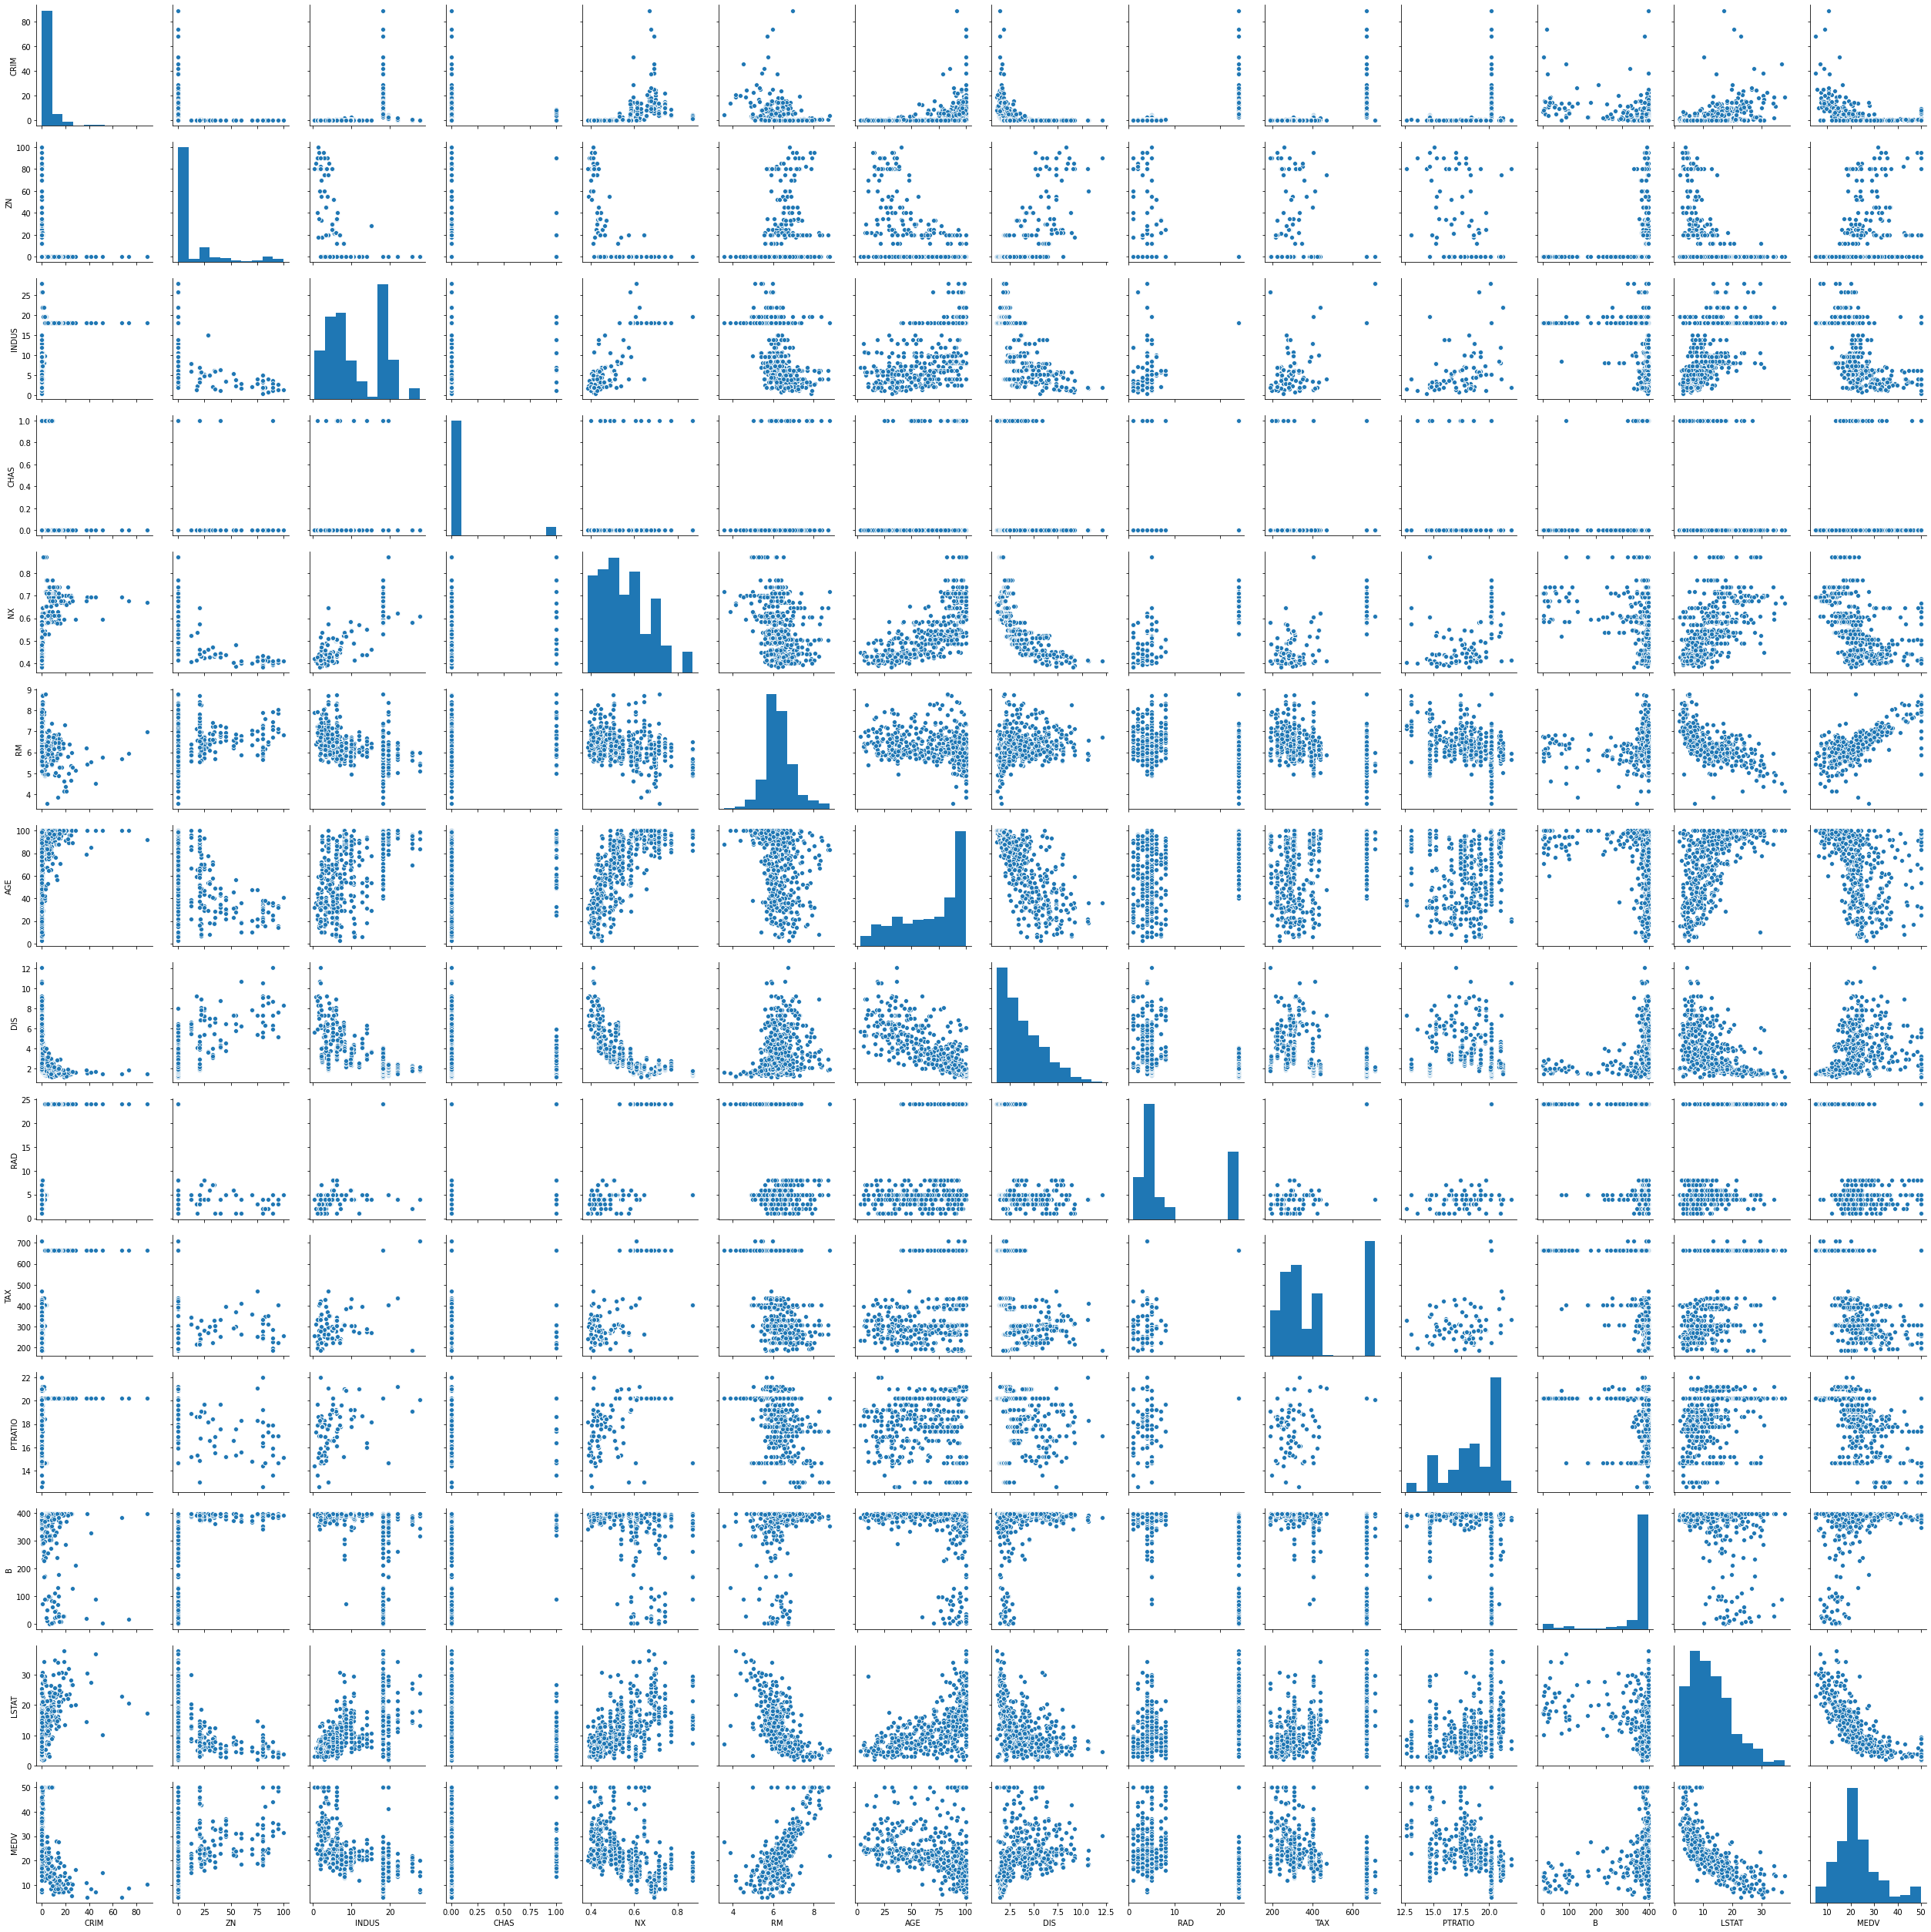

In [45]:
import seaborn as sns 
warnings.filterwarnings("ignore")
penguins = sns.load_dataset("penguins")
sns.pairplot(df)

In [46]:
df=reduce_mem_usage(df)

Memory usage of dataframe is 0.08 MB
Memory usage after optimization is: 0.07 MB
Decreased by 3.7%


In [47]:
from sklearn.preprocessing import LabelEncoder

#### Create the encoder.
# Create arrays for the features and the response variable
y = df['MEDV'].to_numpy()
X = df.drop('MEDV', axis=1).to_numpy()
X[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [48]:
# example of a normalization
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
scaler = MinMaxScaler()
# transform data
X = scaler.fit_transform(X)
print(X[0])

[0.         0.18       0.06781525 0.         0.31481481 0.57750527
 0.64160659 0.26920314 0.         0.20801527 0.28723404 1.
 0.08967991]


In [49]:
names= df.drop('MEDV', axis=1).columns
names

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

[-0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0.]


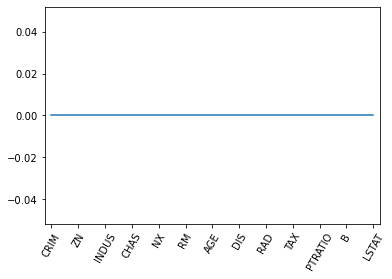

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4,normalize=True)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients

lasso_coef = lasso.fit(X,y).coef_

                      
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)),names, rotation=60)
plt.margins(0.02)
plt.show()

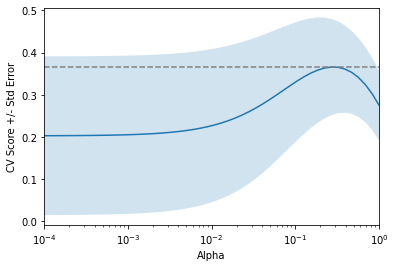

In [51]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()
# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge,X,y,cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)


In [52]:
df = pd.read_csv('/home/abderrazak/ALLINHERE/NLP/Datacamp/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [53]:
df.shape

(768, 9)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [55]:
df.describe ()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [56]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


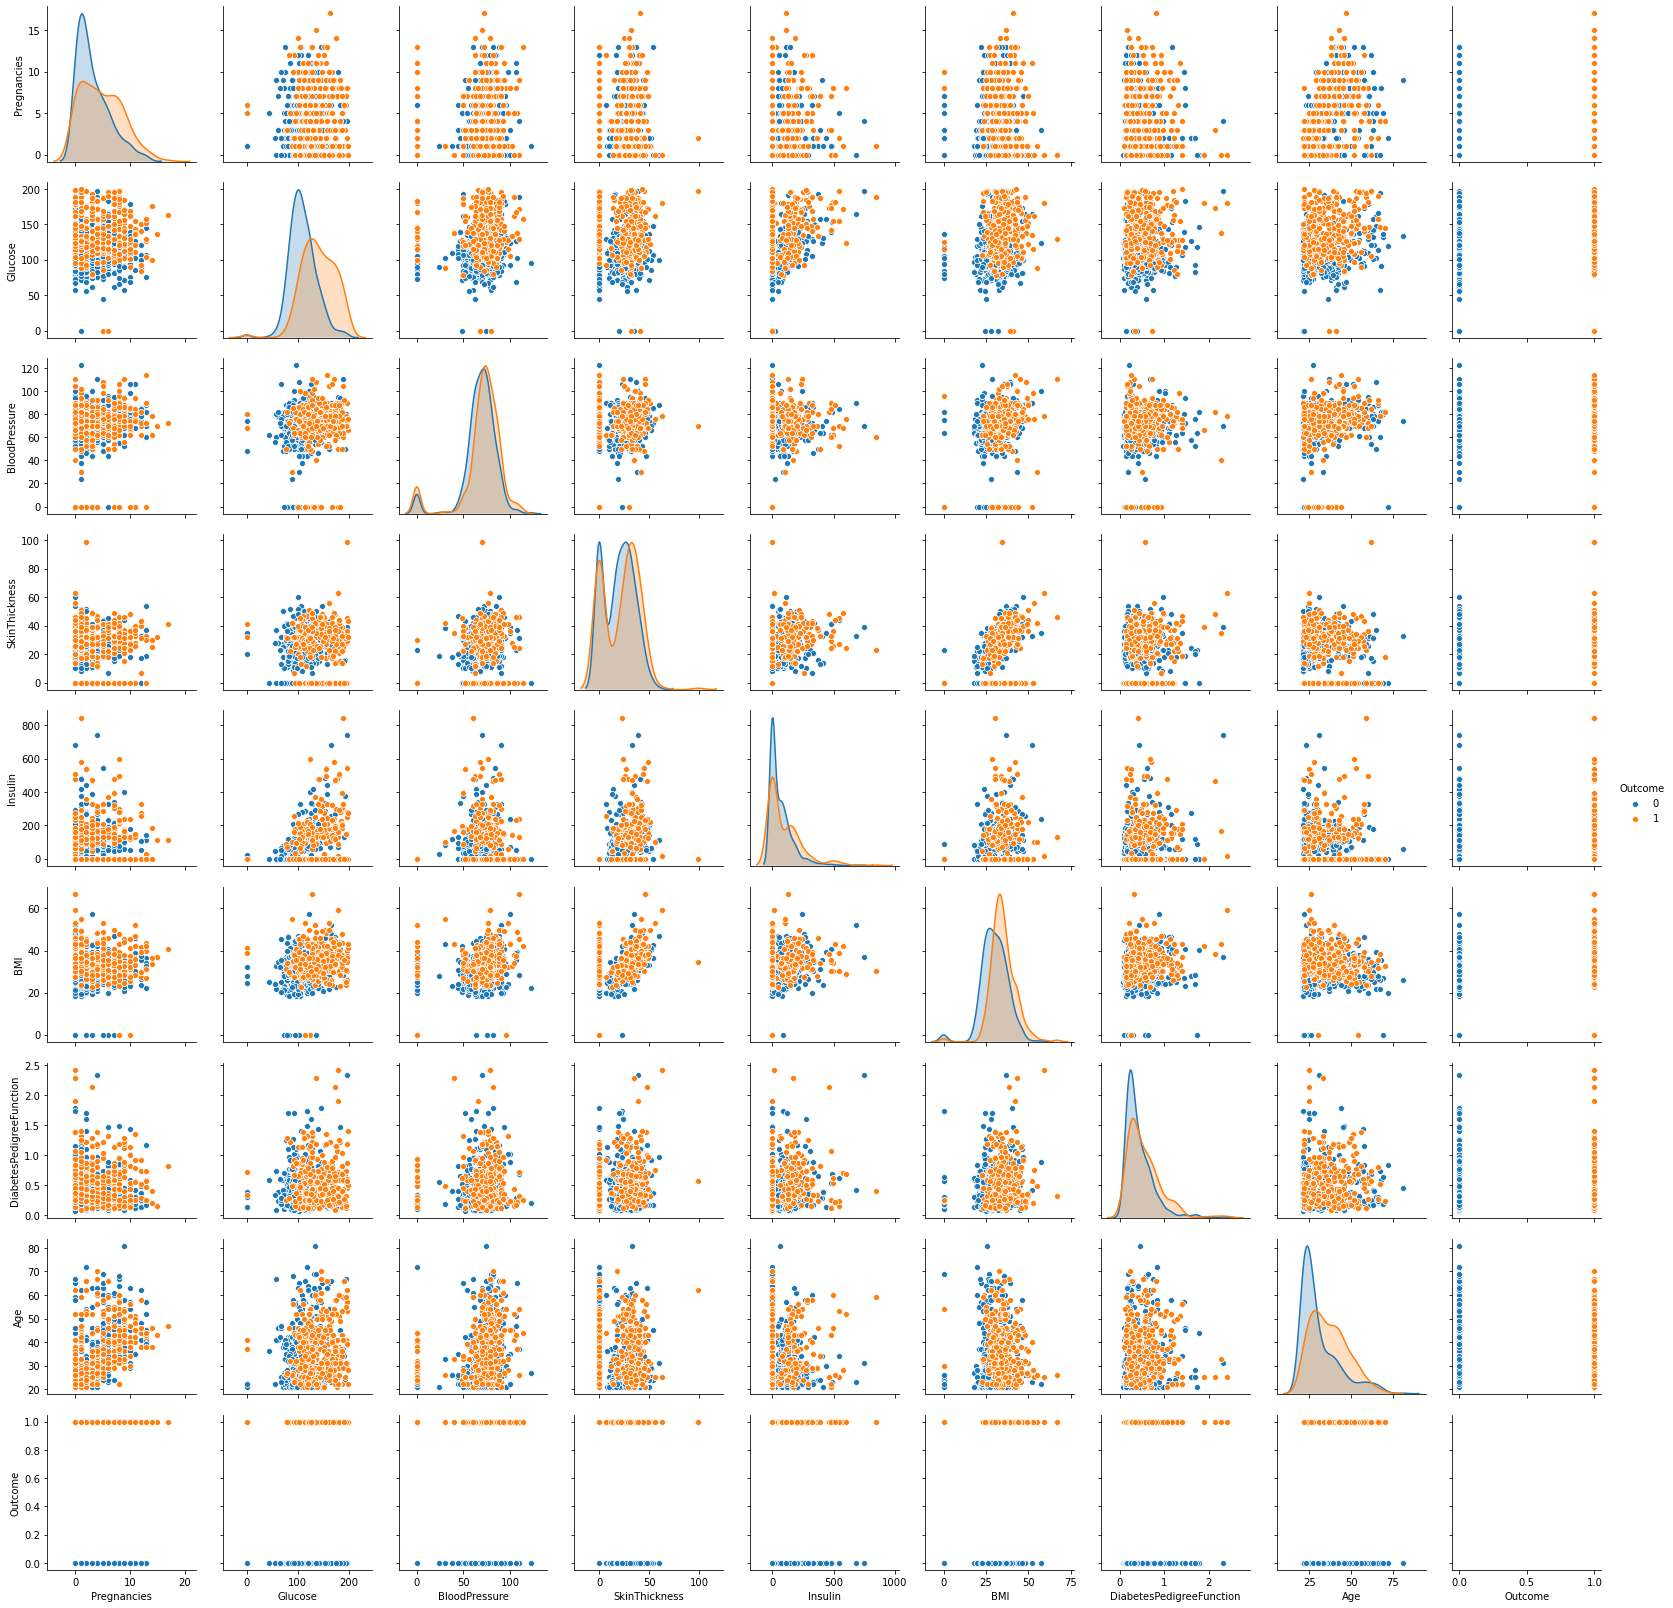

In [57]:
import seaborn as sns 
warnings.filterwarnings("ignore")
penguins = sns.load_dataset("penguins")
sns.pairplot(df, hue= 'Outcome')

<AxesSubplot:>

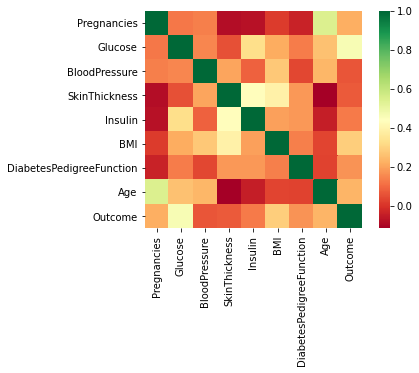

In [58]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

In [59]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

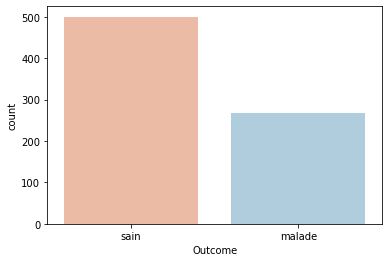

In [60]:
plt.figure()
sns.countplot(x='Outcome', data=df, palette='RdBu')
plt.xticks([0,1], ['sain', 'malade'])
plt.show()

In [61]:
from sklearn.preprocessing import LabelEncoder

#### Create the encoder.
# Create arrays for the features and the response variable
y = df['Outcome'].to_numpy()
X = df.drop('Outcome', axis=1).to_numpy()

# example of a normalization
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
scaler = MinMaxScaler()
# transform data
X = scaler.fit_transform(X)
print(X[0])

[0.35294118 0.74371859 0.59016393 0.35353535 0.         0.50074516
 0.23441503 0.48333333]


In [62]:
#  Import necessary modules
from  sklearn.metrics import classification_report,confusion_matrix



# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4,random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[169  37]
 [ 58  44]]
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       206
           1       0.54      0.43      0.48       102

    accuracy                           0.69       308
   macro avg       0.64      0.63      0.63       308
weighted avg       0.68      0.69      0.68       308



# Logistic regression and the ROC curve


In [63]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data

logreg.fit(X_train,y_train)
# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[179  27]
 [ 43  59]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       206
           1       0.69      0.58      0.63       102

    accuracy                           0.77       308
   macro avg       0.75      0.72      0.73       308
weighted avg       0.77      0.77      0.77       308



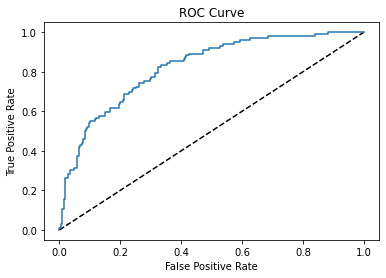

0.822196839901009


In [64]:
# Import necessary modules
from sklearn.metrics import roc_auc_score,roc_curve
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print(roc_auc_score(y_test, y_pred_prob))

In [68]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
y_predprob= logreg.predict_proba(X_test)[:,1]
print('AUC:{}'.format(roc_auc_score(y_test,y_predprob)))
cv = cross_val_score(logreg,X_train,y_train,scoring='roc_auc')
print("aucc for cros val :{}".format(cv)) 
print("meancv : {}".format(np.mean(cv)))

AUC:0.822196839901009
aucc for cros val :[0.80842322 0.82485876 0.8700565  0.80945044 0.81288032]
meancv : 0.8251338461105711


# Hyperparameter tuning

1. Hyperparameter tuning

Welcome back. Now that you're developing a feel for judging how well your models are performing, it is time to supercharge them.

2. Hyperparameter tuning

We have seen that when fitting a linear regression, what we are really doing is choosing parameters for the model that fit the data the best. We also saw that we had to choose a value for the alpha in ridge and lasso regression before fitting it. Analogously, before fitting and predicting K-nearest neighbors, we need to choose n neighbors. Such parameters, ones that need to be specified before fitting a model, are called hyperparameters. In other words, these are parameters that cannot be explicitly learned by fitting the model. Herein lies a fundamental key for building a successful model:

3. Choosing the correct hyperparameter

choosing the correct hyperparameter. The basic idea is to try a whole bunch of different values, fit all of them separately, see how well each performs, and choose the best one! This is called hyperparameter tuning and doing so in this fashion is the current standard. There may be a better way, however, and if you figure it out, I'd be surprised if it wouldn't make you famous. Now, when fitting different values of a hyperparameter, it is essential to use cross-validation as using train test split alone would risk overfitting the hyperparameter to the test set. We'll see in the next video that, even after tuning our hyperparameters using cross-validation, we'll want to have already split off a test set in order to report how well our model can be expected to perform on a dataset that it has never seen before.

4. Grid search cross-validation

The basic idea is as follows: we choose a grid of possible values we want to try for the hyperparameter or hyperparameters. For example, if we had two hyperparameters, C and alpha, the grid of values to test could look like this.

5. Grid search cross-validation

We then perform k-fold cross-validation for each point in the grid, that is, for each choice of hyperparameter or combination of hyperparameters.

6. Grid search cross-validation

We then choose for our model the choice of hyperparameters that performed the best! This is called a grid search and in scikit-learn we implement it using the class GridSearchCV.

7. GridSearchCV in scikit-learn

We import GridSearchCV from sklearn dot model selection. We then specify the hyperparameter as a dictionary in which the keys are the hyperparameter names, such as n neighbors in KNN or alpha in lasso regression. See the documentation of each model for the name of its hyperparameters. The values in the grid dictionary are lists containing the values we wish to tune the relevant hyperparameter or hyperparameters over. If we specify multiple parameters, all possible combinations will be tried. As always, we instantiate our classifier. We then use GridSearchCV and pass it our model, the grid we wish to tune over and the number of folds that we wish to use. This returns a GridSearch object that you can then fit to the data and this fit performs the actual grid search inplace. We can then apply the attributes best params and best score, respectively, to retrieve the hyperparameters that perform the best along with the mean cross-validation score over that fold.

# Hyperparameter tuning with GridSearchCV

Hugo demonstrated how to tune the n_neighbors parameter of the KNeighborsClassifier() using GridSearchCV on the voting dataset. You will now practice this yourself, but by using logistic regression on the diabetes dataset instead!

Like the alpha parameter of lasso and ridge regularization that you saw earlier, logistic regression also has a regularization parameter:
. controls the inverse of the regularization strength, and this is what you will tune in this exercise. A large can lead to an overfit model, while a small

can lead to an underfit model.

The hyperparameter space for
has been setup for you. Your job is to use GridSearchCV and logistic regression to find the optimal

in this hyperparameter space. The feature array is available as X and target variable array is available as y.

You may be wondering why you aren't asked to split the data into training and test sets. Good observation! Here, we want you to focus on the process of setting up the hyperparameter grid and performing grid-search cross-validation. In practice, you will indeed want to hold out a portion of your data for evaluation purposes, and you will learn all about this in the next video!

In [73]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg =LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data

logreg_cv.fit(X,y)
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 31.622776601683793}
Best score is 0.7721925133689839


# Hyperparameter tuning with RandomizedSearchCV

GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions. You'll practice using RandomizedSearchCV in this exercise and see how this works.

Here, you'll also be introduced to a new model: the Decision Tree. Don't worry about the specifics of how this model works. Just like k-NN, linear regression, and logistic regression, decision trees in scikit-learn have .fit() and .predict() methods that you can use in exactly the same way as before. Decision trees have many parameters that can be tuned, such as max_features, max_depth, and min_samples_leaf: This makes it an ideal use case for RandomizedSearchCV. 

In [75]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
# Fit it to the data
tree_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 2}
Best score is 0.7317714964773788


Great work! You'll see a lot more of decision trees and RandomizedSearchCV as you continue your machine learning journey. Note that RandomizedSearchCV will never outperform GridSearchCV. Instead, it is valuable because it saves on computation time.

1. Hold-out set for final evaluation

Congrats on making it through those exercises. I hope that you had some serious fun with GridSearchCV and RandomizedSearchCV. After using K-fold cross-validation to tune my model's hyperparameters,
2. Hold-out set reasoning

I may want to report how well my model can be expected to perform on a dataset that it has never seen before, given my scoring function of choice. So, I want to use my model to predict on some labeled data, compare my prediction to the actual labels, and compute the scoring function. However, if I have used all of my data for cross-validation, estimating my model performance on any of it may not provide an accurate picture of how it will perform on unseen data. For this reason, it is important to split all of my data at the very beginning into a training set and hold-out set, then perform cross-validation on the training set to tune my model's hyperparameters. After this, I can select the best hyperparameters and use the hold-out set, which has not been used at all, to test how well the model can be expected to perform on a dataset that it has never seen before. 

==> The idea is to tune the model's hyperparameters on the training set, and then evaluate its performance on the hold-out set which it has never seen before.

In [77]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.4, random_state= 42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg,param_grid,cv=5)

# Fit it to the training data
logreg_cv.fit(X_train,y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameter: {'C': 268.2695795279727, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7608695652173912


# Hold-out set in practice II: Regression

Remember lasso and ridge regression from the previous chapter? Lasso used the
penalty to regularize, while ridge used the penalty. There is another type of regularized regression known as the elastic net. In elastic net regularization, the penalty term is a linear combination of the and

penalties:

In scikit-learn, this term is represented by the 'l1_ratio' parameter: An 'l1_ratio' of 1 corresponds to an penalty, and anything lower is a combination of and

.

In this exercise, you will GridSearchCV to tune the 'l1_ratio' of an elastic net model trained on the Gapminder data. As in the previous exercise, use a hold-out set to evaluate your model's performance.

In [78]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train,y_train)
# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.018349836398881103
Tuned ElasticNet MSE: 0.21743162039959005



1. Preprocessing data

Welcome to the final chapter of this introductory course on supervised learning with scikit-learn! You have learnt how to implement both classification and regression models, how to measure model performance, and how to tune hyperparameters in order to improve performance. However, all the data that you have used so far has been relatively nice and in a format that allows you to plug and play into scikit-learn from the get-go. With real-world data, this will rarely be the case, and instead you will have to preprocess your data before you can build models. In this chapter, you will learn all about this vital preprocessing step.

2. Dealing with categorical features

Say you are dealing with a dataset that has categorical features, such as 'red' or 'blue', or 'male' or 'female'. As these are not numerical values, the scikit-learn API will not accept them and you will have to preprocess these features into the correct format. Our goal is to convert these features so that they are numerical. The way we achieve this by splitting the feature into a number of binary features called 'dummy variables', one for each category: '0' means the observation was not that category, while '1' means it was.

3. Dummy variables

For example, say we are dealing with a car dataset that has a 'origin' feature with three different possible values: 'US', 'Asia', and 'Europe'.

4. Dummy variables

We create binary features for each of the origins, as each car is made in exactly one country, each row in the dataset will have a one in exactly one of the three columns and zeros in the other two. Notice that in this case, if a car is not from the US and not from Asia, then implicitly, it is from Europe. That means that we do not actually need three separate features, but only two, so we can

5. Dummy variables

delete the 'Europe' column. If we do not do this, we are duplicating information, which might be an issue for some models.

6. Dealing with categorical features in Python

There are several ways to create dummy variables in Python. In scikit-learn, we can use OneHotEncoder. Or we can use pandas' get dummies function. Here, we will use get dummies.

7. Automobile dataset

The target variable here is miles per gallon or mpg. Remember that there is one categorical feature, origin, with three possible values: 'US', 'Asia', and 'Europe'.

8. EDA w/ categorical feature

Here is a box plot showing how mpg varies by origin. Let's encode this feature using dummy variables.

9. Encoding dummy variables

We import pandas, read in the DataFrame, and then apply the get dummies function. Notice, how pandas creates three new binary features. In the third row, origin USA and origin Europe have zeroes, while origin Asia has a one, indicating that the car is of Asian origin. But if origin USA and origin Europe are zero, then we already know that the car is Asian!

10. Encoding dummy variables

So, we drop the origin Asia column. Alternatively, we could have passed the "drop first" option to get dummies. Notice that the new column names have the following structure: original column name, underscore, value name. Once we have created our dummy variables, we can fit models as before.

11. Linear regression with dummy variables

Here, for example, we fit the ridge regression model to the data and compute its R-squared.

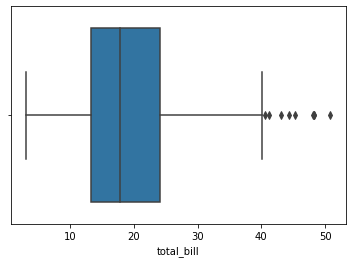

In [80]:
import seaborn as sns

tips = sns.load_dataset("tips")

ax = sns.boxplot(x=tips["total_bill"])

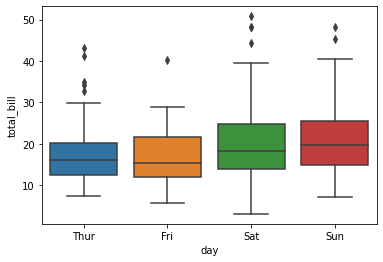

In [81]:
ax = sns.boxplot(x="day", y="total_bill", data=tips)

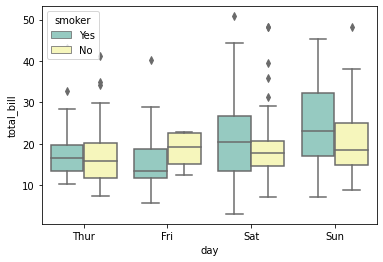

In [82]:
ax = sns.boxplot(x="day", y="total_bill", hue="smoker",

                 data=tips, palette="Set3")

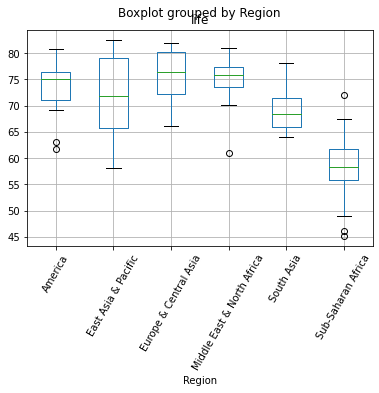

In [107]:
# Import pandas
import pandas as pd 


# Read 'gapminder.csv' into a DataFrame: df
df = pd.read_csv('/home/abderrazak/ALLINHERE/NLP/Datacamp/gm_2008_region.csv')

# Create a boxplot of life expectancy per region
df.boxplot('life', 'Region', rot=60)

# Show the plot
plt.show()


In [108]:
df.head(2)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa


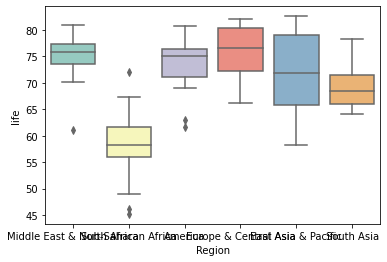

In [109]:
ax = sns.boxplot(x="Region", y="life",

                 data=df, palette="Set3")

In [110]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df,drop_first=True)

# Print the new columns of df_region
print(df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


In [111]:
df_region.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,1
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,0,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,0,1,0,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,1,0,0,0,0


In [119]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df


# Create arrays for features and target variabledf = pd.read_csv('/home/abderrazak/ALLINHERE/NLP/Datacamp/gm_2008_region.csv')

y = df_region['life'].to_numpy()
X= df_region.drop('life',axis=1).to_numpy()
# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y =y.reshape(-1,1)
#X = X.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))


Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139, 13)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 13)


In [120]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5, normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge,X,y,cv=5)

# Print the cross-validated scores
print(ridge_cv)


[0.86808336 0.80623545 0.84004203 0.7754344  0.87503712]


In [121]:
# example of a normalization
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
scaler = MinMaxScaler()
# transform data
X = scaler.fit_transform(X)
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5, normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge,X,y,cv=5)

# Print the cross-validated scores
print(ridge_cv)


[0.86808336 0.80623545 0.84004203 0.7754344  0.87503712]


5. Dropping missing data

We can do so using the pandas DataFrame method dropna. Checking out the shape of the resulting data frame, though, we see that we now have only approximately half the rows left! We've lost half of our data and this is unacceptable. If only a few rows contain missing values, then it's not so bad, but generally we need a more robust method. It is generally an equally bad idea to remove columns that contain NaNs.

6. Imputing missing data

Another option is to impute missing data. All imputing means is to make an educated guess as to what the missing values could be. A common strategy is, in any given column with missing values, to compute the mean of all the non-missing entries and to replace all missing values with the mean. Let's try this now on our dataset. We import Imputer from sklearn dot preprocessing and instantiate an instance of the Imputer: imp. The keyword argument missing values here specifies that missing values are represented by NaN; strategy specifies that we will use the mean as described above; axis equals 0 specifies that we will impute along columns, a '1' would mean rows. Now, we can fit this imputer to our data using the fit method and then transform our data using the transform method! Due to their ability to transform our data as such, imputers are known as transformers, and any model that can transform data this way, using the transform method, is called a transformer. After transforming the data, we could then fit our supervised learning model to it, but is there a way to do both at once?

7. Imputing within a pipeline

There sure is! We can use the scikit-learn pipeline object. We import Pipeline from sklearn dot pipeline and Imputer from sklearn dot preprocessing. We also instantiate a log reg model. We then build the Pipeline object! We construct a list of steps in the pipeline, where each step is a 2-tuple containing the name you wish to give the relevant step and the estimator. We then pass this list to the Pipeline constructor. We can split our data into training and test sets and

8. Imputing within a pipeline

fit the pipeline to the training set and then predict on the test set, as with any other model. For good measure here, we compute accuracy. Note that, in a pipeline, each step but the last must be a transformer and the last must be an estimator, such as, a classifier or a regressor.

In [124]:
df = pd.read_csv('/home/abderrazak/ALLINHERE/NLP/Datacamp/diabetes.csv')
print(df.isnull().sum())
df.head()

pregnancies    0
glucose        0
diastolic      0
triceps        0
insulin        0
bmi            0
dpf            0
age            0
diabetes       0
dtype: int64


,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [125]:
# Convert '?' to NaN
df[df == '?'] = np.nan

# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))


pregnancies    0
glucose        0
diastolic      0
triceps        0
insulin        0
bmi            0
dpf            0
age            0
diabetes       0
dtype: int64
Shape of Original DataFrame: (768, 9)
Shape of DataFrame After Dropping All Rows with Missing Values: (768, 9)


In [139]:
from sklearn.preprocessing import LabelEncoder

#### Create the encoder.
# Create arrays for the features and the response variable
y = df['diabetes'].to_numpy()
X = df.drop('diabetes', axis=1).to_numpy()

# example of a normalization
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
#scaler = MinMaxScaler()
# transform data
# X = scaler.fit_transform(X)
# print(X[0])

In [146]:
# Import the Imputer module
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
# Setup the Imputation transformer: imp
imp =  SimpleImputer(missing_values= np.nan, strategy='most_frequent')
scaler = MinMaxScaler()

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
         ('scaler',scaler),
        ('SVM', clf )]
pipline=Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 42)
pipline.fit(X_train,y_train)
# Predict the labels of the test set
y_pred =pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.76      0.87      0.81       151
           1       0.66      0.49      0.56        80

    accuracy                           0.74       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.73      0.74      0.72       231



In [143]:
# Import necessary modules
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the pipeline steps: steps
steps = [('imputation', SimpleImputer(missing_values= np.nan, strategy='most_frequent')),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train,y_train)

# Predict the labels of the test set
y_pred =pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.76      0.87      0.81       151
           1       0.66      0.49      0.56        80

    accuracy                           0.74       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.73      0.74      0.72       231



# Centering and scaling

MinMaxScaler(feature_range = (0, 1)) will transform each value in the column proportionally within the range [0,1]. Use this as the first scaler choice to transform a feature, as it will preserve the shape of the dataset (no distortion).

StandardScaler() will transform each value in the column to range about the mean 0 and standard deviation 1, ie, each value will be normalised by subtracting the mean and dividing by standard deviation. Use StandardScaler if you know the data distribution is normal.

If there are outliers, use RobustScaler(). Alternatively you could remove the outliers and use either of the above 2 scalers (choice depends on whether data is normally distributed)

In [147]:
df = pd.read_csv('/home/abderrazak/ALLINHERE/NLP/Datacamp/white-wine.csv')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [148]:
from sklearn.preprocessing import LabelEncoder

#### Create the encoder.
# Create arrays for the features and the response variable
y = df['quality'].to_numpy()
X = df.drop('quality', axis=1).to_numpy()


In [149]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train,y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test,y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test,y_test)))


Accuracy with Scaling: 0.5496598639455782
Accuracy without Scaling: 0.47551020408163264


 It looks like scaling has significantly improved model performance!

In [150]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline,param_grid=parameters)

# Fit to the training set
cv.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.6081632653061224
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.24      0.39      0.30        28
           5       0.61      0.62      0.61       289
           6       0.66      0.66      0.66       447
           7       0.62      0.54      0.58       177
           8       0.47      0.42      0.44        38

    accuracy                           0.61       980
   macro avg       0.43      0.44      0.43       980
weighted avg       0.61      0.61      0.61       980

Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.1}


In [153]:
df = pd.read_csv('/home/abderrazak/ALLINHERE/NLP/Datacamp/gm_2008_region.csv')
df.shape

(139, 10)

In [154]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df


# Create arrays for features and target variabledf = pd.read_csv('/home/abderrazak/ALLINHERE/NLP/Datacamp/gm_2008_region.csv')
df.shape
y = df['life'].to_numpy()
X = df['fertility'].to_numpy()

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y =y.reshape(-1,1)
X = X.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))


Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


In [157]:
# Setup the pipeline steps: steps
steps = [('imputation', SimpleImputer(missing_values=np.nan, strategy='mean')),
         ('scaler', StandardScaler()),
         ('elasticnet',ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline,param_grid=parameters)

# Fit to the training set
gm_cv.fit(X_train,y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.7804250309450611
